# Constant-Coefficient Poisson Equation

We want to solve 

$$\phi_{xx} + \phi_{yy} = -2[(1-6x^2)y^2(1-y^2) + (1-6y^2)x^2(1-x^2)]$$

on 

$$[0,1]\times [0,1]$$ 

with homogeneous Dirichlet boundary conditions (this example comes from _A Multigrid Tutorial_).

This has the analytic solution
$$u(x,y) = (x^2 - x^4)(y^4 - y^2)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Setting up the solver

We start by setting up a multigrid object&mdash;this needs to know the number of zones our problem is defined on

In [2]:
import pyro.multigrid.MG as MG

In [3]:
nx = ny = 256
mg = MG.CellCenterMG2d(nx, ny, 
                       xl_BC_type="dirichlet", xr_BC_type="dirichlet",
                       yl_BC_type="dirichlet", yr_BC_type="dirichlet", verbose=1)

cc data: nx = 2, ny = 2, ng = 1
         nvars = 3
         variables:
               v: min:    0.0000000000    max:    0.0000000000
                  BCs: -x: dirichlet    +x: dirichlet    -y: dirichlet    +y: dirichlet   
               f: min:    0.0000000000    max:    0.0000000000
                  BCs: -x: dirichlet    +x: dirichlet    -y: dirichlet    +y: dirichlet   
               r: min:    0.0000000000    max:    0.0000000000
                  BCs: -x: dirichlet    +x: dirichlet    -y: dirichlet    +y: dirichlet   

cc data: nx = 4, ny = 4, ng = 1
         nvars = 3
         variables:
               v: min:    0.0000000000    max:    0.0000000000
                  BCs: -x: dirichlet    +x: dirichlet    -y: dirichlet    +y: dirichlet   
               f: min:    0.0000000000    max:    0.0000000000
                  BCs: -x: dirichlet    +x: dirichlet    -y: dirichlet    +y: dirichlet   
               r: min:    0.0000000000    max:    0.0000000000
                  BCs: -

Next, we initialize the RHS.  To make life easier, the `CellCenterMG2d` object has the coordinates of the solution grid (including ghost cells) as `mg.x2d` and `mg.y2d` (these are two-dimensional arrays).

In [4]:
def rhs(x, y):
    return -2.0 * ((1.0 - 6.0 * x**2) * y**2 * (1.0 - y**2) +
                   (1.0 - 6.0 * y**2) * x**2 * (1.0 - x**2))

In [5]:
mg.init_RHS(rhs(mg.x2d, mg.y2d))

Source norm =  1.097515813669473


The last setup step is to initialize the solution--this is the starting point for the solve.  Usually we just want to start with all zeros, so we use the `init_zeros()` method

In [6]:
mg.init_zeros()

## Performing the solve

We can now solve&mdash;there are actually two different techniques we can do here.  We can just do pure smoothing on the solution grid using `mg.smooth(mg.nlevels-1, N)`, where `N` is the number of smoothing iterations.  To get the solution `N` will need to be large and this will take a long time.

Multigrid accelerates the smoothing.  We can do a V-cycle multigrid solution using `mg.solve()`

In [7]:
mg.solve()

source norm =  1.097515813669473
<<< beginning V-cycle (cycle 1) >>>

  level: 7, grid: 256 x 256
  before G-S, residual L2: 1.097515813669473
  after G-S, residual L2: 1.502308451578657

  level: 6, grid: 128 x 128
  before G-S, residual L2: 1.0616243965458263
  after G-S, residual L2: 1.4321452257629033

  level: 5, grid: 64 x 64
  before G-S, residual L2: 1.011366277976364
  after G-S, residual L2: 1.281872470375375

  level: 4, grid: 32 x 32
  before G-S, residual L2: 0.903531158162907
  after G-S, residual L2: 0.9607576999783505

  level: 3, grid: 16 x 16
  before G-S, residual L2: 0.6736112182020367
  after G-S, residual L2: 0.4439774050299674

  level: 2, grid: 8 x 8
  before G-S, residual L2: 0.30721142286171554
  after G-S, residual L2: 0.0727215591269748

  level: 1, grid: 4 x 4
  before G-S, residual L2: 0.04841813458618458
  after G-S, residual L2: 3.9610700301811246e-05

  bottom solve:
  level: 0, grid: 2 x 2

  level: 1, grid: 4 x 4
  before G-S, residual L2: 3.925006722

## Plotting the solution

We can access the solution on the finest grid using `get_solution()`

In [8]:
phi = mg.get_solution()

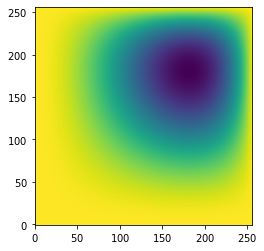

In [9]:
fig, ax = plt.subplots()
ax.imshow(np.transpose(phi.v()), origin="lower")

We can also get the gradient of the solution

In [10]:
gx, gy = mg.get_solution_gradient()

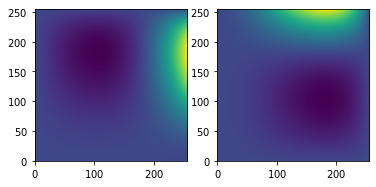

In [11]:
fig = plt.figure()

ax = fig.add_subplot(121)
ax.imshow(np.transpose(gx.v()), origin="lower")

ax = fig.add_subplot(122)
ax.imshow(np.transpose(gy.v()), origin="lower")